In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

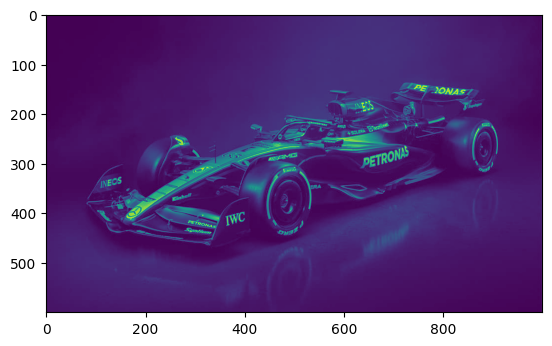

In [38]:
img = cv2.imread('/content/Merc-AMG-W15.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

# Fourier transformation

In [39]:
def fourier_transform(image):
    f_transform = fft2(image)
    f_transform_shifted = fftshift(f_transform)
    return f_transform_shifted


In [40]:
f_transform_shifted = fourier_transform(img)

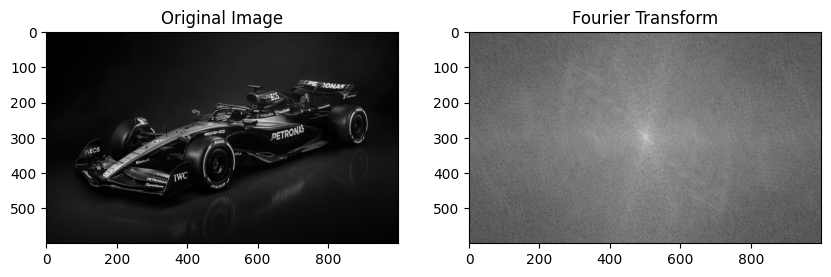

In [41]:
transformed = np.log(1+np.abs(f_transform_shifted))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(transformed, cmap='gray')
plt.title('Fourier Transform')

plt.show()

In [42]:
def inverse_fourier_transform(f_transform_shifted):
    f_ishift = ifftshift(f_transform_shifted)
    img_back = np.abs(ifft2(f_ishift))
    return img_back

# Ideal Low Pass Filter

In [43]:
def create_ideal_low_pass_mask(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    return mask

In [44]:
low_pass_mask = create_ideal_low_pass_mask(f_transform_shifted.shape, radius=30)
low_pass_filtered = f_transform_shifted * low_pass_mask

# Inverse Fourier Transform

In [45]:
img_low_pass = inverse_fourier_transform(low_pass_filtered)

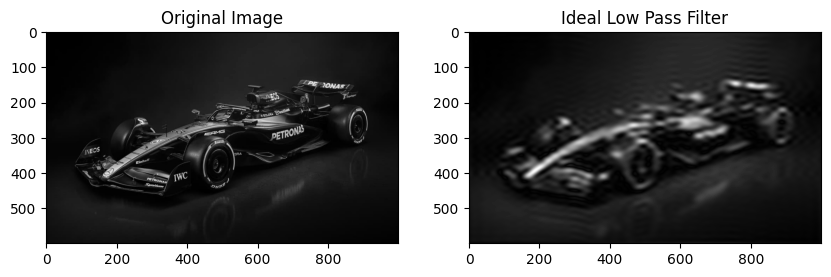

In [46]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_low_pass, cmap='gray')
plt.title("Ideal Low Pass Filter")

plt.show()

# Ideal High Pass Filter

In [47]:
def create_ideal_high_pass_mask(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0
    return mask

In [48]:
high_pass_mask = create_ideal_high_pass_mask(f_transform_shifted.shape, radius=30)
high_pass_filtered = f_transform_shifted * high_pass_mask

# Inverse Fourier Transform

In [49]:
img_high_pass = inverse_fourier_transform(high_pass_filtered)

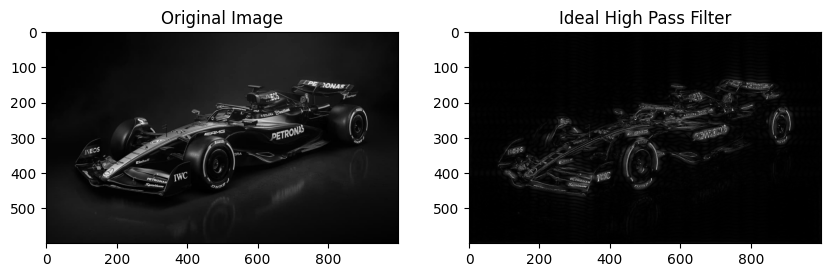

In [50]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_high_pass, cmap='gray')
plt.title("Ideal High Pass Filter")

plt.show()

# Gaussian Low Pass Mask

In [51]:
def create_gaussian_low_pass_mask(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = np.exp(-((x - crow) ** 2 + (y - ccol) ** 2) / (2.0 * sigma**2))
    return mask

In [52]:
gaussian_low_mask = create_gaussian_low_pass_mask(f_transform_shifted.shape, sigma=10)
gaussian_low_filtered = f_transform_shifted * gaussian_low_mask

# Inverse Fourier Transform

In [53]:
img_gaussian_low = inverse_fourier_transform(gaussian_low_filtered)

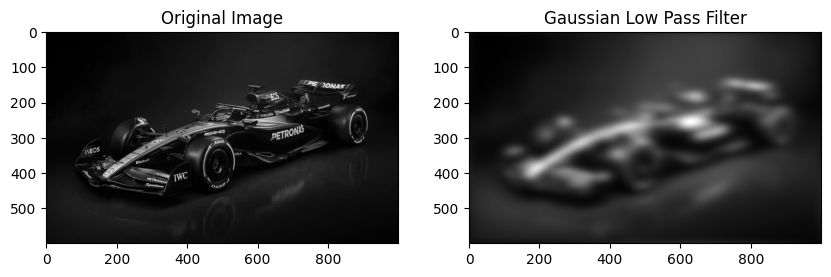

In [54]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_gaussian_low, cmap='gray')
plt.title("Gaussian Low Pass Filter")

plt.show()

# Gaussian High Pass Mask

In [55]:
def create_gaussian_high_pass_mask(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = 1 - np.exp(-((x - crow) ** 2 + (y - ccol) ** 2) / (2.0 * sigma**2))
    return mask

In [56]:
gaussian_high_mask = create_gaussian_high_pass_mask(f_transform_shifted.shape, sigma=10)
gaussian_high_filtered = f_transform_shifted * gaussian_high_mask

# Inverse Fourier Transform

In [57]:
img_gaussian_high = inverse_fourier_transform(gaussian_high_filtered)

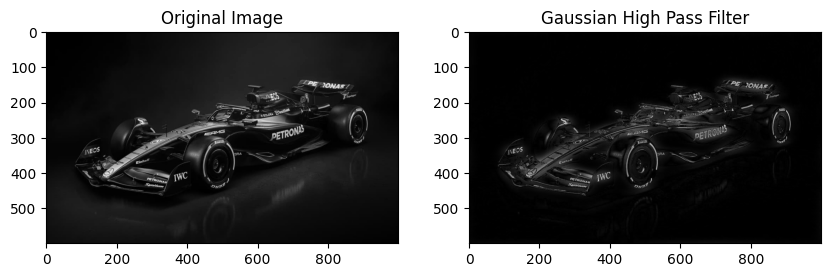

In [58]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_gaussian_high, cmap='gray')
plt.title("Gaussian High Pass Filter")

plt.show()

# Fashion MNIST Images

In [59]:
from tensorflow.keras.datasets import fashion_mnist

In [60]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [61]:
random_image = x_test[12]

In [62]:
def display_images(original, transformed, title_transformed):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1,2,2)
    plt.imshow(transformed, cmap='gray')
    plt.title(title_transformed)

    plt.show()

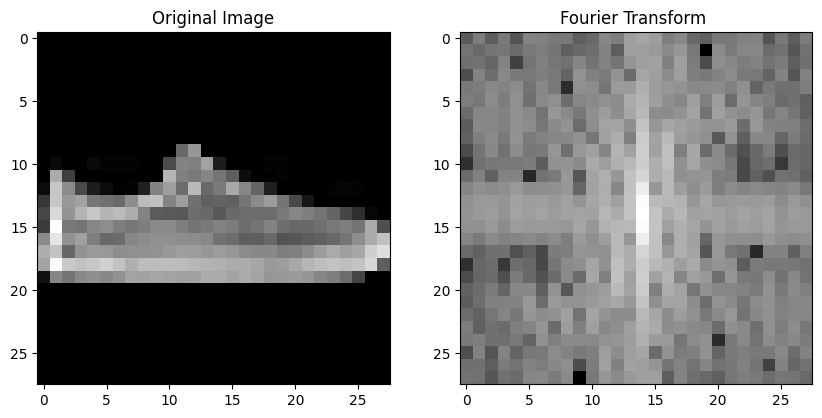

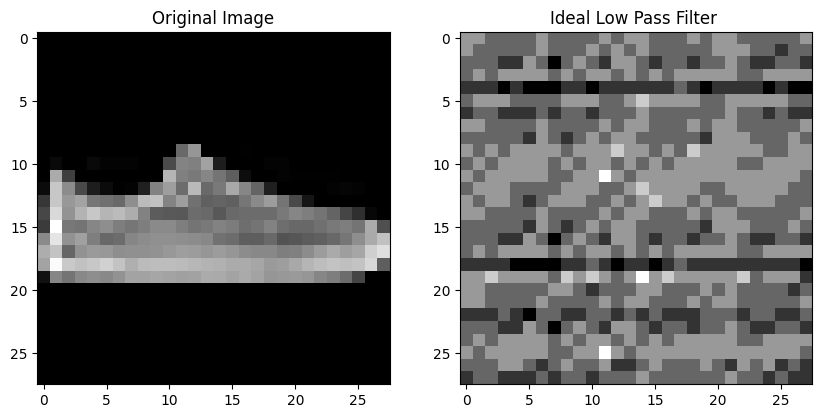

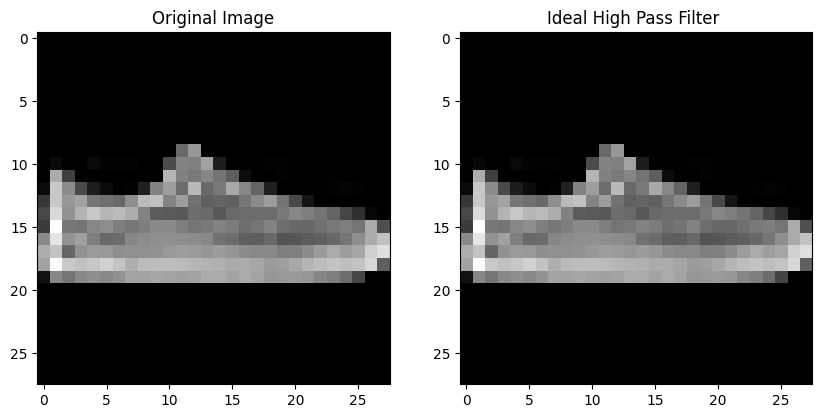

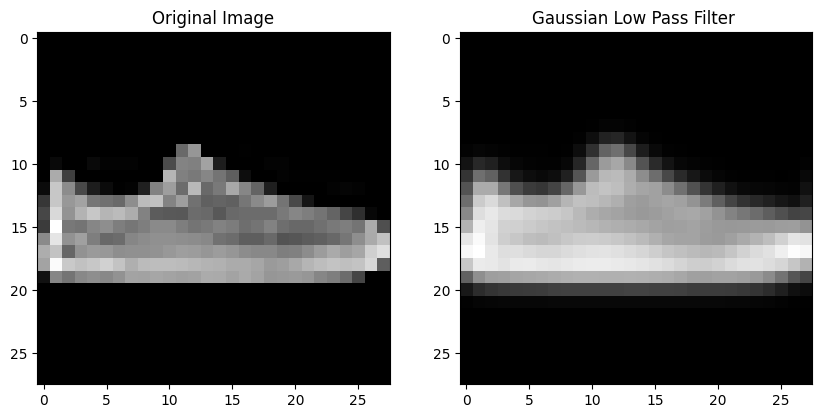

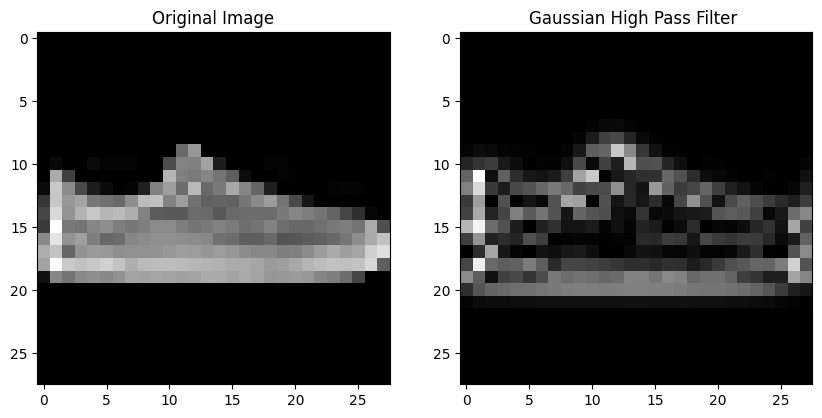

In [63]:
f_transform_shifted_fashion = fourier_transform(random_image)
display_images(random_image, np.log(np.abs(f_transform_shifted_fashion)), "Fourier Transform ")

low_pass_mask_fashion = create_ideal_low_pass_mask(f_transform_shifted_fashion.shape, radius=15)
low_pass_filtered_fashion = f_transform_shifted_fashion * low_pass_mask_fashion
img_low_pass_fashion = inverse_fourier_transform(low_pass_filtered_fashion)
display_images(random_image, img_low_pass_fashion, "Ideal Low Pass Filter ")

high_pass_mask_fashion = create_ideal_high_pass_mask(f_transform_shifted_fashion.shape, radius=15)
high_pass_filtered_fashion = f_transform_shifted_fashion * high_pass_mask_fashion
img_high_pass_fashion = inverse_fourier_transform(high_pass_filtered_fashion)
display_images(random_image, img_high_pass_fashion, "Ideal High Pass Filter ")

gaussian_low_mask_fashion = create_gaussian_low_pass_mask(f_transform_shifted_fashion.shape, sigma=5)
gaussian_low_filtered_fashion = f_transform_shifted_fashion * gaussian_low_mask_fashion
img_gaussian_low_fashion = inverse_fourier_transform(gaussian_low_filtered_fashion)
display_images(random_image, img_gaussian_low_fashion, "Gaussian Low Pass Filter ")

gaussian_high_mask_fashion = create_gaussian_high_pass_mask(f_transform_shifted_fashion.shape, sigma=5)
gaussian_high_filtered_fashion = f_transform_shifted_fashion * gaussian_high_mask_fashion
img_gaussian_high_fashion = inverse_fourier_transform(gaussian_high_filtered_fashion)
display_images(random_image, img_gaussian_high_fashion, "Gaussian High Pass Filter ")

# **APPLICATIONS**

* **Ideal Low Pass Filter (ILPF)**:

 ILPF reduces noise and smooths images, commonly used in medical imaging (e.g., MRI, CT) to enhance clarity by removing high-frequency noise. It also softens images in photography and video editing and aids in motion detection by isolating moving objects from static backgrounds.

* **Ideal High Pass Filter (IHPF)**:

 IHPF is used for edge detection and feature enhancement in tasks like object recognition and image segmentation. It sharpens images in facial recognition, photography, and digital media by amplifying high-frequency details.

* **Gaussian Low Pass Filter (GLPF)**:

 GLPF reduces noise with smoother transitions, useful in medical imaging (ultrasound), image smoothing in photography, and stabilizing video frames by minimizing jitter.

* **Gaussian High Pass Filter (GHPF)**:

 GHPF enhances textures, detecting surface defects in manufacturing and improving satellite imagery interpretation. It also aids augmented reality by enhancing features for overlaying digital objects in real-world scenes.



# **CONCLUSION**

These filtering techniques are essential across diverse fields like medical imaging, computer vision, photography, and remote sensing. The **Ideal Low Pass Filter** reduces noise to improve diagnostic images, while the **Ideal High Pass Filter** enhances object detection and recognition. The **Gaussian Low Pass Filter** improves visual aesthetics in photography and stabilizes video playback, while the **Gaussian High Pass Filter** boosts texture and aids in augmented reality. Their versatility underscores their importance in modern image processing, enabling users to customize their approach for specific applications.